In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# <b><font size="7" color="red">ch10. N차원 배열(Numpy 배열) 다루기</font></b>
- [numpy](http://www.numpy.org)
- [numpy docs](https://numpy.org/doc/stable/)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1장 넘파이 패키지

In [3]:
# np.arange(from,stop,by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
import numpy as np
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [25]:
from numpy import arange
a = arange(15, dtype=np.int8).reshape(3, 5) # 3행 5열짜리 2차원 배열로 변환
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [21]:
type(a) # a변수의 타입

numpy.ndarray

In [26]:
a.dtype # a배열의 요소들의 type

dtype('int8')

In [23]:
a.dtype.name

'int64'

In [27]:
a.itemsize # a배열안의 한 요소의 bytesize

1

## 1.2 배열 타입 변경

In [28]:
a = arange(12).reshape(3,4)

In [29]:
a.size

12

In [30]:
a.dtype

dtype('int32')

In [31]:
a.dtype = np.int64 # 읽을 때 int64로(64bit씩) 읽는다

In [32]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [34]:
# 배열요소의 타입을 수정
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
a.astype('int64')
# a.astype(np.int64)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [41]:
a.ravel() # flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
a.flatten() # 함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## 1.3 배열 저장
- pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷, io속도개선)

In [43]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [47]:
%%time
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a,f)

CPU times: total: 0 ns
Wall time: 778 µs


In [48]:
%%time
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)

CPU times: total: 0 ns
Wall time: 7.4 ms


In [46]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [49]:
%%time
np.save('data/ch10.npy', a) # 저장

CPU times: total: 0 ns
Wall time: 6.62 ms


# 2장 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty....linspace
- 랜덤값을 갖는 함수들 : np.random.~
## 2.1 arrat()함수로 넘파이 배열 만들기
    - array(ob), dtype=np.XX나 'XX', copy=T/F)

In [50]:
a = np.array([2, 4, 6], dtype=np.int16) # 정수의 기본타입은 int32
a

array([2, 4, 6])

In [51]:
for i in a:
    print(i, end="\t")

2	4	6	

In [55]:
b = np.array([[1.5, 2.3],[4, 5]]) # 배열은 동일 자료형의 집합 : 정수->실수->문자
b[0][1], b[0,1] # 2차원 [axis0행, axis1열]

(2.3, 2.3)

In [54]:
l = [[1.5,2.3],[4,5]]
l[0][1]

2.3

In [56]:
print(b.dtype) # 점수 기본타입은 int32, 실수 기본타임은 float64
print(b.itemsize)

float64
8


In [58]:
b.astype(np.float32) # 함수의 결과를 return하면 a는 그대로

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [59]:
for row in b:
    for item in row:
        print(item, end='\t')
    print() # 개행

1.5	2.3	
4.0	5.0	


In [62]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print(f'{i}행{j}열 : {item}({b[i,j]})', end='\t')
    print()

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [64]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int16)

In [65]:
b[0,1]

2

In [ ]:
b[3,0] #없는 인덱싱시 에러

In [82]:
b[0:2,1:3], b[0:3,4:5], b[2], b[2,:4]

(array([[2, 3],
        [7, 8]], dtype=int16),
 array([[ 5],
        [10],
        [15]], dtype=int16),
 array([11, 12, 13, 14, 15], dtype=int16),
 array([11, 12, 13, 14], dtype=int16))

In [93]:
print('0~1행, 1~2열 :\n',b[0:2,1:3])
print('2행모두(1차원) :', b[2])
print('2행모두(2차원) :', b[2:3])
print('4열(마지막)모두 :', b[:,-1])
print('2행 0~3열 :', b[2,:4])
print('마지막열 제외 :\n', b[:,:-1])

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행모두(1차원) : [11 12 13 14 15]
2행모두(2차원) : [[11 12 13 14 15]]
4열(마지막)모두 : [ 5 10 15]
2행 0~3열 : [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [94]:
# numpy 배열
import numpy as np
c = np.array([[1,2],[3,4]])
# d = c # 주소할당
d = np.array(c, copy=True) # 깊은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))

## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype속성을 따로 지정 가능

In [102]:
x = np.zeros((3,))
x

array([0., 0., 0.])

In [103]:
x = np.zeros((5,5), dtype=np.int16)
print(x)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [97]:
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [104]:
np.ones((3,5), dtype=np.uint8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [99]:
np.full((3,5),3)

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

<function matplotlib.pyplot.show(close=None, block=None)>

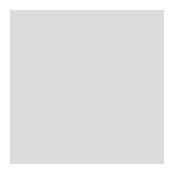

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기 figsize(가로,세로)
img = np.full((16,16), 220, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # 축없애기
plt.show

In [120]:
np.empty((4,5)) # 초기값이 메모리 상태에 따라 다름

array([[0. , 0. , 0.3, 1. , 0. ],
       [0. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 1. ]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.randem.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값 배열
- np.randem.uniform(low=0.0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0 size=tup) : 평균loc와 표준편자 scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열발생 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1)

<function matplotlib.pyplot.show(close=None, block=None)>

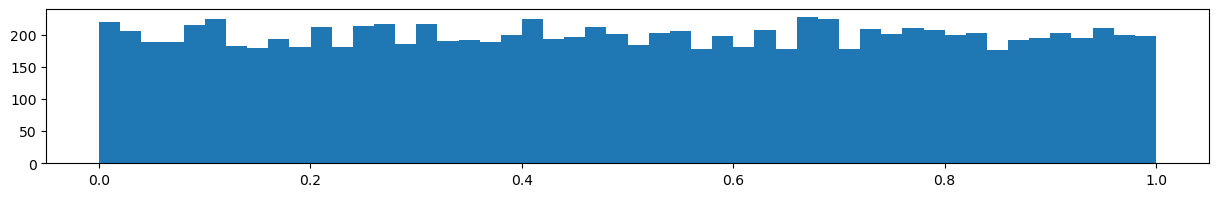

In [130]:
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프크기
plt.hist(x, bins=50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

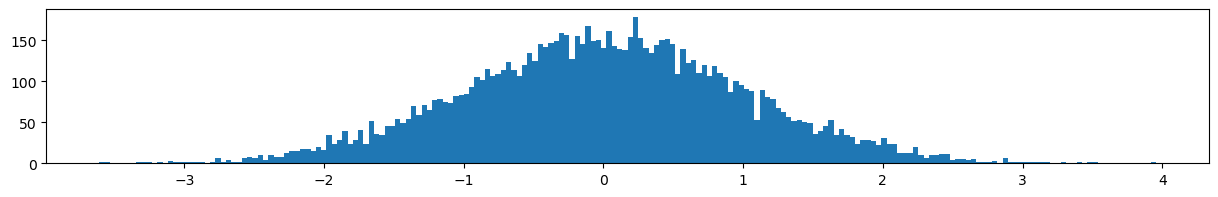

In [136]:
x = np.random.randn(10000)
plt.figure(figsize=(15,2)) # 그래프크기
plt.hist(x, bins=200)
plt.show

In [137]:
# 1차원 난수 배열
print(np.random.rand(3)) # 균등분포
print(np.random.randn(3)) # 정규분포

[0.59527723 0.46948358 0.07878675]
[-0.86381714  2.85661206  1.81796213]


In [140]:
# 2차원 난수 배열
np.random.random((2,5)) # 2행5열짜리 균등분포(0~1미만) 난수 배열

array([[0.97490358, 0.84397944, 0.5095081 , 0.58661725, 0.95389683],
       [0.99638937, 0.68905032, 0.59801708, 0.93058369, 0.30500013]])

In [145]:
np.random.uniform(low=-2, high=2, size=(2,5)) # 2행5열짜리 균등분포(-2~2미만) 난수 배열

array([[-1.52451986, -1.8171217 , -1.83025623, -1.1617836 , -1.40675458],
       [-1.64052271, -0.20179824,  1.25466396, -1.58977515, -1.54345115]])

In [144]:
np.random.normal(size=(2,5)) # 2행5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[ 0.10346613,  0.67032601, -1.57028628,  1.25123065, -0.53513595],
       [ 0.54362658, -0.29163902, -0.78866811, -0.64240492, -0.78626487]])

In [146]:
np.random.normal(-1,1,(2,5)) # 2행5열짜리 정규분포(평균-1, 표준편차1) 난수 배열

array([[-1.6118378 , -2.79636253,  0.66247233, -2.50573938,  0.33725408],
       [-1.54963918, -1.25803517, -1.70323035, -0.19087395, -2.03077338]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

In [147]:
np.arange(10, 30, 1, dtype='int8')

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29], dtype=int8)

In [148]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [154]:
# linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(1, 2*pi, 1000)
y = np.sin(x)

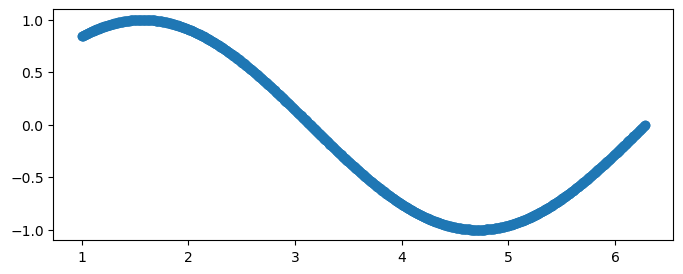

In [155]:
plt.figure(figsize=(8, 3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

ValueError: cannot reshape array of size 3 into shape (3,5)